2 4
(201, 2)
(200, 3)
117 83 0


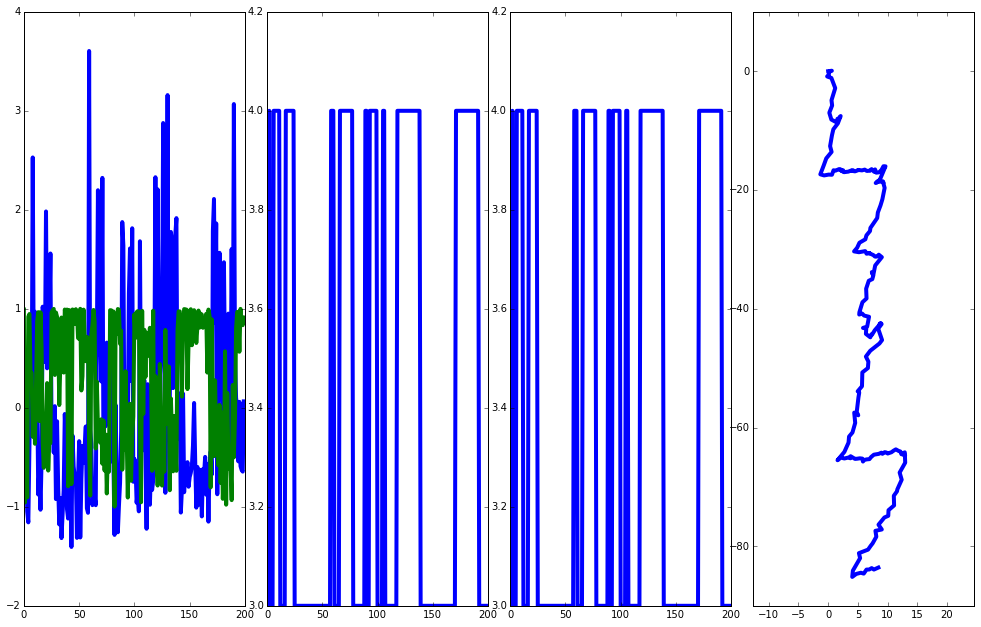

In [359]:
from yahmm import *
import random
import math
import copy
#from matplotlib.axis import axis
from Tools import plot_label, get_step_class , traj_to_dist

def one_particle_n_states(ListState0,transition_mat=[],StateN={},selfprob=0.033):
  

    model = Model( name="Unknown" )
    
    pre=0.0001
    Ra0 = State(NormalDistribution(StateN["Ra0"], pre), name="Ra0")
    Ra1 = State(NormalDistribution(StateN["Ra1"], pre), name="Ra1") 
     
    Ra2 = State(NormalDistribution(StateN["Ra2"], pre), name="Ra2")   
    """
    Ra3 = State(NormalDistribution(StateN["Ra3"], pre), name="Ra3")
    Ra4 = State(NormalDistribution(StateN["Ra4"], pre), name="Ra4")   
    Ra5 = State(NormalDistribution(StateN["Ra5"], pre), name="Ra5") 
    
    """
    Le0 = State(NormalDistribution(StateN["Le0"], pre), name="Le0")
    #Le1 = State(NormalDistribution(StateN["Le1"], pre), name="Le1")
    #i0 = State(NormalDistribution(StateN["Ri0"], pre), name="Ri0")
    Ri0 = State(NormalDistribution(StateN["Ri0"], pre), name="Ri0")

    Ri1 = State(NormalDistribution(StateN["Ri1"], pre), name="Ri1")

    
    ListStatet=[Ra0,Ra1,Ra2,Le0,Ri0,Ri1]#,Ra3,Ra4,Ra5,Le0]#,Ri0]#,Ri1,Le1]
    ListState = []
    for i in ListState0:
        ListState.append(ListStatet[i])
        
    #print [l.name for l in ListState]
    for state in ListState:
        model.add_state(state)
       
    endp=0.0001
    for state0 in ListState:
        for state1 in ListState:
            if state1.name == state0.name:
                s0=0.166
                s0=selfprob
                model.add_transition(state0, state1,s0)
            else:
                model.add_transition(state0,state1, (1-s0-endp)/(len(ListState)-1) )

   
    for state in ListState:

        model.add_transition(model.start,state, 1.0/len(ListState))
        model.add_transition(state,model.end, endp)
   

    model.bake()
    
    return model



def generate_traj(time,step=1,sigma=0.2,nstate=3):
    
    
    #nstate = np.random.randint(1,6)
    #nstate=6
    #ListState = range(6)
    #np.random.shuffle(ListState)
    #ListState = ListState[:nstate]
    
    
    
    #0 1 = random
    #2 3 = Left
    #4 5 = Right
    
    #if 1 in ListState and not 0 in ListState:
    #    ListState[ListState.index(1)] = 0
    #if 3 in ListState and not 2 in ListState:
    #    ListState[ListState.index(3)] = 2
    #if 5 in ListState and not 4 in ListState:
    #    ListState[ListState.index(5)] = 4
    
    StateN = {"Ra0": 0,"Ra1":1,"Ra2":2,"Le0":3,"Ri0":4,"Ri1":5}#,"Ra3": 3,"Ra4":4,"Ra5":5,"Le0":6}
    iStateN = {v:k for k,v in StateN.items()}
    
    Model_type = {"D":[0,["Ra0"]],
                  "Dv":[1,["Le0"]],
                  "D-D":[2,["Ra0","Ra1"]],
                  "D-DvL":[3,["Ra0","Le0"]],
                  "DvR-DvL":[4,["Le0","Ri0"]],
                  "D-D-D":[5,["Ra0","Ra1","Ra2"]],
                  "D-D-DvL":[6,["Ra0","Ra1","Le0"]],
                  "D-DvL-DvR":[7,["Ra0","Le0","Ri0"]],
                  "D-D-DvL-DvR":[8,["Ra0","Ra1","Le0","Ri0"]],  
                  "DvL-DvR-DvR1":[9,["Le0","Ri0","Ri1"]],
                  "D-DvL-DvR-DvR1":[10,["Ra0","Le0","Ri0","Ri1"]],
                  "D-D-DvL-DvR-DvR1":[11,["Ra0","Ra1","Le0","Ri0","Ri1"]]}
                  #}
                
    """
    
    Model_type = {"D":[0,["Ra0"]],"D-D":[1,["Ra0","Ra1"]],"D-D-D":[2,["Ra0","Ra1","Ra2"]]}
    #print ListState
    Model_num =  np.random.randint(0,3)
    ModelN = Model_type.keys()
    ModelN.sort()
    ModelN = ModelN[Model_num]
    Model_num=Model_type[ModelN][0]"""
    
    iModel = {v[0]:k for k,v in Model_type.items()}
    Model_num =  np.random.randint(0,12)
    
    #Model_num = 9
    
    
    
    ListState = [StateN[iname] for iname in Model_type[iModel[Model_num]][1]]

    #ListState=[0]
    selfprob = 0.4 + 0.6*random.random()
    #print "Sampling",ListState
    model = one_particle_n_states(ListState0=ListState,StateN=StateN,selfprob=selfprob)
    #print "ENdS"
    seq = np.zeros(time)
    sequence  = model.sample(time)
    
    
    scale = 1+9*random.random()
    
    
    delta = 0.2
    
    cats = scale*np.random.random()
    
   
   
    
    
    Ra0 = [0,cats]
    Ra1 = [0,max(1.5*Ra0[0]+scale*np.random.random(),scale)]
    
    
    Ra2 = [0,max(1.5*Ra1[1]+scale*np.random.random(),scale)]
    #Ra3 = [0,(1.00+0.33*random.random())]
    #Ra4 = [0,(1.33+0.33*random.random())]
    #Ra5 = [0,(1.66+0.33*random.random())]
    
    cats = scale*np.random.random(2)
    #cats.sort()
    #cats = cats[::-1]
 
    #Ri1 = [max(1.5*Ri0[0],random.random()),0.2]
    D ={"Ra0": Ra0,"Ra1":Ra1,"Ra2":Ra2} ##,"Ra3":Ra3,"Ra4":Ra4,"Ra5":Ra5,"Le0":Le0,"Ri0":Ri0}
    
    #print D
    
    #for tt,(n,s) in enumerate(model.viterbi(sequence)[1][1:-1]):
    namesl = []
    alpha2 = 0.15*3.14 + 1.85*3.14*random.random()
    #alpha2 = -3.14
    dalpha2 = max(0.1,0.8*np.random.random())
    dalpha1 = max(0.1,0.8*np.random.random())


    traj = np.zeros((time,2))
    tot0 = 0
    tot1 = 0
    
    mus1 = scale*(1-2*np.random.random(2))
    
    mus2 = mus1.copy() 
    
    mus3 = mus1.copy() 
    deltav = 0.1
    deltav=0.4
    while np.sqrt(np.sum((mus1-mus2)**2)) < deltav*scale and \
            np.sqrt(np.sum((mus1-mus3)**2)) < deltav*scale  and \
            np.sqrt(np.sum((mus2-mus3)**2)) < deltav*scale :
        
        
        mus1 = scale*(1-2*np.random.random(2))
        mus2 = scale*(1-2*np.random.random(2))
        mus3 = scale*(1-2*np.random.random(2))

        
        
        if mus1[0] < mus2[0]:
            mus1,mus2=mus2,mus1
            
        if mus1[0] < mus3[0]:
            mus1,mus3=mus3,mus1
            
        if mus2[0] < mus3[0]:
            mus2,mus3=mus3,mus2
        mus1[1] = 0 
        

    epsilon=1e-7

    rho1 = np.random.random() + epsilon
    sigmas1 = scale*np.random.random(2) + epsilon
    
    rho2 = np.random.random() + epsilon
    sigmas2 = scale*np.random.random(2) + epsilon
    
    rho3 = np.random.random() + epsilon
    sigmas3 = scale*np.random.random(2) + epsilon
    #if np.sum(mus1**2) > np.sum(mus2**2):
    #    mus1,mus2=mus2,mus1
        

    
    
    #Borned:
    d1 = np.sqrt(np.sum(mus1**2))+epsilon
    if d1 < 0.01:
        mus1 = 0.01*mus1/d1
        
    sigmas1[0]  = min(d1/4,sigmas1[0])
    sigmas1[1]  = min(d1/4,sigmas1[1])
    
    
    d2 = np.sqrt(np.sum(mus2**2))+epsilon
    if d2 < 0.01:
        mus2 = 0.01*mus2/d2
        
    sigmas2[0]  = min(d2/4,sigmas2[0])
    sigmas2[1]  = min(d2/4,sigmas2[1])
    
    
    d3 = np.sqrt(np.sum(mus3**2))+epsilon
    if d3 < 0.01:
        mus3 = 0.01*mus3/d3
        
    sigmas3[0]  = min(d3/4,sigmas3[0])
    sigmas3[1]  = min(d3/4,sigmas3[1])
    
        
    #mus2 = scale*
    
    for tt,v in enumerate(sequence):
        
        
        seq[tt] = int(round(v,0))
        name = iStateN[seq[tt]]
        namesl.append(name)
        
        if name in ["Ra0","Ra1","Ra2","Ra3","Ra4","Ra5"]:
            traj[tt][0] =np.random.normal(D[name][0],D[name][1])
            traj[tt][1] =np.random.normal(D[name][0],D[name][1])

        if name in ["Le0"]:
            
            #theta = dalpha1*(1-2*random.random())
            #Dist = max(0.001,np.random.normal(D[name][0],D[name][1]))
           
            x,y = numpy.random.multivariate_normal(mus1,[[sigmas1[0],sigmas1[0]*sigmas1[1]*rho1],
                                                         [sigmas1[0]*sigmas1[1]*rho1,sigmas1[1]]])
            traj[tt][0] = x
            traj[tt][1] = y       

            #tot0 += Dist
        if name in ["Ri0"]:
            
            #theta = alpha2  + dalpha2*(1-2*random.random())
            #Dist =  max(0.001,np.random.normal(D[name][0],D[name][1]))
            
            x,y = numpy.random.multivariate_normal(mus2,[[sigmas2[0],sigmas2[0]*sigmas2[1]*rho2],
                                                         [sigmas2[0]*sigmas2[1]*rho2,sigmas2[1]]])
            traj[tt][0] = x
            traj[tt][1] = y
            
            
                    #tot0 += Dist
        if name in ["Ri1"]:
            
            #theta = alpha2  + dalpha2*(1-2*random.random())
            #Dist =  max(0.001,np.random.normal(D[name][0],D[name][1]))
            
            x,y = numpy.random.multivariate_normal(mus3,[[sigmas3[0],sigmas3[0]*sigmas3[1]*rho3],
                                                         [sigmas3[0]*sigmas3[1]*rho3,sigmas3[1]]])
            traj[tt][0] = x
            traj[tt][1] = y
           

            
    """
    end = random.randint(150,300)
    #end =280

    if end < 200:
        dist_t[end:,:]=0
        seq[end:]=4
        
    if end > 250:
        end -= 200
        end1 = random.randint(10,50)
        #print end1,end
        dist_t[end1:end1+end,:]=0
        seq[end1:end1+end]=4"""
        
        
    """
    if 1 in seq and 0 not in seq:
        seq[seq==1] = 0
    if 3 in seq and 2 not in seq:
        seq[seq==3] = 2
    if 5 in seq and 4 not in seq:
        seq[seq==5] = 4"""
    
    def down_grade(seq,Model_num):

        realname = list(set(seq))

        Nrealcat = [iStateN[ireal] for ireal in realname] 

        realname.sort()
        realname = [iStateN[ir] for ir in realname]
        translate = {StateN[iname]:i for i,iname in enumerate(realname)}
        Nrealcat = realname
        bNrealcat = copy.deepcopy(Nrealcat)
        seq = np.array(seq)

        
        if "Ra1" in Nrealcat and not "Ra0" in Nrealcat:
            seq[seq==StateN["Ra1"]] = StateN["Ra0"]
            
        realname = list(set(seq))

        Nrealcat = [iStateN[ireal] for ireal in realname] 
        
        if "Ra2" in Nrealcat and not "Ra1" in Nrealcat:
            if "Ra0" in Nrealcat:
                seq[seq==StateN["Ra2"]] = StateN["Ra1"]
                
            else:
                seq[seq==StateN["Ra2"]] = StateN["Ra0"]
        
        if "Ri0" in Nrealcat and not "Le0" in Nrealcat:
            seq[seq==StateN["Ri0"]] = StateN["Le0"]
            
        realname = list(set(seq))

        Nrealcat = [iStateN[ireal] for ireal in realname] 
        if "Ri1" in Nrealcat and not "Ri0" in Nrealcat:
            if "Le0" in Nrealcat:
                seq[seq==StateN["Ri1"]] = StateN["Ri0"]
                
            else:
                seq[seq==StateN["Ri1"]] = StateN["Le0"]
                
        realname = list(set(seq))

        Nrealcat = [iStateN[ireal] for ireal in realname] 
        Nrealcat.sort()
        #Classing by frequencies
        
        if "Ri0" in Nrealcat and "Le0" in Nrealcat:
            if np.sum(seq==StateN["Ri0"]) >  np.sum(seq==StateN["Le0"]) :
                seq[seq==StateN["Ri0"]] = 1000
                seq[seq==StateN["Le0"]] = StateN["Ri0"]
                seq[seq==1000] = StateN["Le0"]
                
        if "Ri0" in Nrealcat and "Le0" in Nrealcat and "Ri1" in Nrealcat:
            freq = [[np.sum(seq==StateN["Le0"]),"Le0"],
                    [np.sum(seq==StateN["Ri0"]),"Ri0" ],
                    [np.sum(seq==StateN["Ri1"]),"Ri1" ]]
            
            freq.sort()
            freq = freq[::-1]
            seq1 = copy.deepcopy(seq)
            
            seq1[seq == StateN[freq[0][1]]] = StateN["Le0"]
            seq1[seq == StateN[freq[1][1]]] = StateN["Ri0"]
            seq1[seq == StateN[freq[2][1]]] = StateN["Ri1"]
      
            seq = seq1
           
                
                
        #Dowgrading models:

     
        found=False
        for k,v in Model_type.items():
            cats = v[1]
            cats.sort()
            if cats == Nrealcat:
                Model_num = v[0]
                found=True
                break
        if not found:
            print bNrealcat
            print Nrealcat
            raise "nimportquei"
        
            
                    

        return seq,Model_num
    
    seq,Model_num = down_grade(seq,Model_num)
    #print translate
    traj = np.cumsum(np.concatenate(([[0,0]],traj)),axis=0)
    
    
    normed= [copy.deepcopy( np.sqrt(np.sum((traj[1:]-traj[:-1])**2,axis=1)))]
    #print normed[0].shape
    normed.append((traj[1:,0]-traj[:-1,0])/normed[0])
    normed.append((traj[1:,1]-traj[:-1,1])/normed[0])
    
    normed = np.array(normed).T
    
    #print normed.shape
    normed[::,0] = normed[::,0]-np.mean(normed[::,0])
    normed[::,0] /= np.std(normed[::,0])
    
    ModelN = len(set(namesl))
    return ModelN,Model_num,seq,seq,traj,normed,alpha2

ModelN,Model_num,s,sc,traj,normed,alpha2 = generate_traj(200)
print ModelN,Model_num
f = figure(figsize=(15,10))
ax = f.add_subplot(141)
plot(normed[::,0])
plot(normed[::,1])
ax = f.add_subplot(142)

plot(s)
ax = f.add_subplot(143)
plot(sc)
ax = f.add_subplot(144)
#print traj.shape
plot(traj[::,0],traj[::,1])
axis("equal")

print traj.shape
print normed.shape

print np.sum(s == 3) , np.sum(s == 4) , np.sum(s == 5)

#print normed.shape

In [23]:
#range(7)[:np.random.randint(1,8)]

[0, 1, 2, 3, 4, 5]

(51, 2)
(50, 5)


'\naxis /= axis.std()\nprint axis\nx_axis, y_axis = axis\n# Trick to get legend to work\nplot(0.01 * x_axis, 0.1 * y_axis, linewidth=2, color="r")\nquiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,\n           color="r")\nfigure()\nplot(n[::,0],n[::,1])\n#axis("equal")\nfigure()\nhist(d[::,1],bins=20)\n#plot()\n\n\ntest = X_train[0]\nseq = np.argmax(Y_train[0],axis=-1)\nprint seq\ntraj = plot_traj(test,label=seq,toplot=True)\n#plot(traj[::,0],traj[::,1])\nfigure()\nwtraj,d =traj_to_dist(traj[::,:2])\nplot(wtraj[::,0],wtraj[::,1])\n\nfigure()\nprint d[:10,0],test[:10,0]\nprint d[:10,1],test[:10,1]'

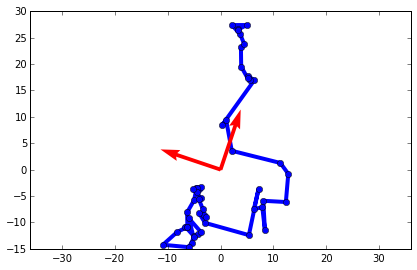

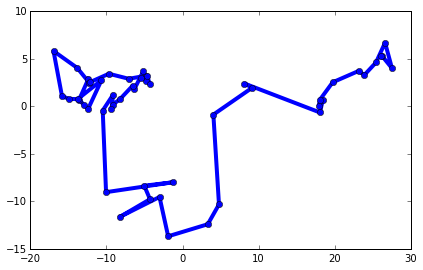

In [398]:
#Draw traj from HMM
#from pylab import plot
from numpy import mean,cov,cumsum,dot,linalg,array,rank

def plot_traj(X,label=[],random_sin=[],toplot=True):
    colors = {0:"b",1:"g",2:"r",3:"k"}

    for i,(d,t) in enumerate(X):
       
        plot(X[i:i+2,0],X[i:i+2:,1],color=colors[label[i]])
        
def random_rot(traj,alpha):
    
    axis = [[np.cos(-alpha),np.cos(-alpha+3.14/2)],
           [np.sin(-alpha),np.sin(-alpha+3.14/2)]]
    
    axis=np.array(axis)
    

    newtraj =  (traj-mean(traj.T,axis=1)).T 

    return dot(axis.T,newtraj).T
    




#traji =  X_traj_test[50][1][::,:2]
#traji = np.array([[0,1.0*i] for i in range(10)],dtype=np.float)
#traji[0,0] = 3.0
#traji[0,1] += 0.2
traji = X_traj[1][1]
print traji.shape
n,d,alpha,axis1=traj_to_dist(traji,bins=10)
figure()
plot(traji[::,0],traji[::,1],"o-")
x_axis, y_axis = axis1

plot(0.01 * x_axis, 0.1 * y_axis, linewidth=2, color="r")
quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
           color="r")
print d.shape
axis("equal")
figure()
trajip = n #traji[1:]-traji[:-1]
plot(trajip[::,0],trajip[::,1],"o-")
"""
axis /= axis.std()
print axis
x_axis, y_axis = axis
# Trick to get legend to work
plot(0.01 * x_axis, 0.1 * y_axis, linewidth=2, color="r")
quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
           color="r")
figure()
plot(n[::,0],n[::,1])
#axis("equal")
figure()
hist(d[::,1],bins=20)
#plot()


test = X_train[0]
seq = np.argmax(Y_train[0],axis=-1)
print seq
traj = plot_traj(test,label=seq,toplot=True)
#plot(traj[::,0],traj[::,1])
figure()
wtraj,d =traj_to_dist(traj[::,:2])
plot(wtraj[::,0],wtraj[::,1])

figure()
print d[:10,0],test[:10,0]
print d[:10,1],test[:10,1]"""
#plot()


In [361]:
X_traj = []
X_train = []
Y_train = []
Y_trains = []
Y_train_cat = []


for i in range(80000):
#for i in range(1000):

    if i % 1000 == 0:
        print i
    sigma = max(np.random.normal(0.5,1),0.05)
    step = max(np.random.normal(1,1),0.2)
    tryagain = True
    while tryagain:
        try:
            f = 2
            mod = 20000
            if i % mod  < f* 2000:
                size = 50
            elif f*2000 <= i % mod < f*4000:
                size=100
            elif f*4000 <= i % mod< f*6000:
                size=150
            elif f*6000 <= i % mod< f*8000:
                size=200
            elif f*8000 <= i % mod < f*10000:
                size=26
            #size=50
            ModelN,Model_num,s,sc,real_traj,norm,alpha2 = generate_traj(size,step=step,sigma=sigma)
            
               
            alpharot = 2*3.14*np.random.random()
            
            real_traj  = random_rot(real_traj,alpharot)
            
            alligned_traj,normed,alpha,_ = traj_to_dist(real_traj[::,:2])
            
            
            X_traj.append([normed,real_traj,alligned_traj])
            """ 
            if 3 in sc and 4 in sc:
                #print i, alpha2,alpha
                #delta = np.abs(alpha-alpha2-alpharot)
                delta = np.abs(alpharot-alpha)
                if not(delta < 0.2 or delta > 6):
                    #print "la"
                    sc = np.array(sc)

                    sc[sc == 4] = 5
                    sc[sc == 3] = 4
                    sc[sc == 5] = 3"""
            
            tryagain=False
        except IndexError:
            tryagain=True
    X_train.append(normed)
    res = np.zeros((size,7))
    res[range(size),np.array(s,dtype=np.int)] = 1
    Y_train.append(res)
    
    res = np.zeros((size,7))
    res[range(size),np.array(sc,dtype=np.int)] = 1
    Y_trains.append(res)
    #Category
    resc = np.zeros((1,12))
    resc[0,Model_num] = 1
    Y_train_cat.append(resc)
#print np.sum(np.isnan(X_train))

/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:282: RuntimeWarning: covariance is not positive-semidefinite.
/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:259: RuntimeWarning: covariance is not positive-semidefinite.
/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:270: RuntimeWarning: covariance is not positive-semidefinite.


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000


In [409]:
#random.seed(0)
#np.random.seed(0)
X_traj_test =[]
X_test = []
Y_test = []
Y_tests = []
Y_test_cat = []
for i in range(1000):
    
    step=2
    sigma=1
    sigma = max(np.random.normal(0.5,1),0.05)
    step = max(np.random.normal(1,1),0.2)
    tryagain =True
    while tryagain:
        try:
            size_traj=200
            M1,Model_num,s,sc,real_traj,n,alpha2 = generate_traj(size_traj)#,step=step,sigma=sigma)
            
            
            
            alpharot = 2*3.14*np.random.random()
            real_traj  = random_rot(real_traj,alpharot)
            
            alligned_traj,normed,alpha,_ = traj_to_dist(real_traj[::,:2])
            X_traj_test.append(["0",real_traj,alligned_traj])
           
            tryagain=False
            """
            if 3 in sc and 4 in sc:
                #print i,alpha2,alpha,alpharot
                delta = np.abs(alpharot-alpha)
                delta2 =np.abs(alpha2+alpharot)
                #print delta,delta2
                if not (delta < 0.2 or delta > 6):
                    #print "la"
                    sc = np.array(sc)
                    
                    sc[sc == 4] = 5
                    sc[sc == 3] = 4
                    sc[sc == 5] =3"""
              
                   
                    
        except IndexError:
            tryagain=True
   
    X_test.append(normed)
    res = np.zeros((size_traj,7))
    res[range(size_traj),np.array(s,dtype=np.int)] = 1
    Y_test.append(res)
    
    res = np.zeros((size_traj,7))
    res[range(size_traj),np.array(sc,dtype=np.int)] = 1
    Y_tests.append(res)
    resc = np.zeros((1,12))
    resc[0,Model_num] = 1
    Y_test_cat.append(resc)
    #print np.array(s+1,dtype=np.int)
    #print res

/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:259: RuntimeWarning: covariance is not positive-semidefinite.
/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:270: RuntimeWarning: covariance is not positive-semidefinite.
/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:282: RuntimeWarning: covariance is not positive-semidefinite.


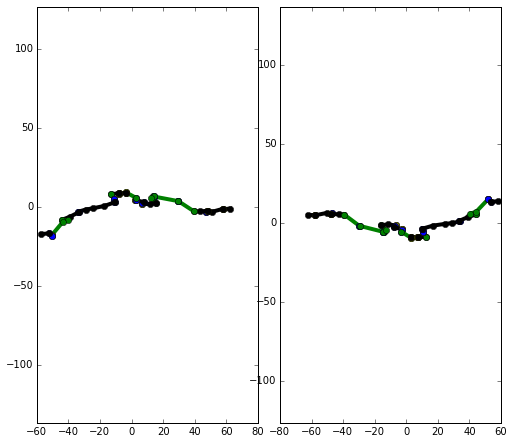

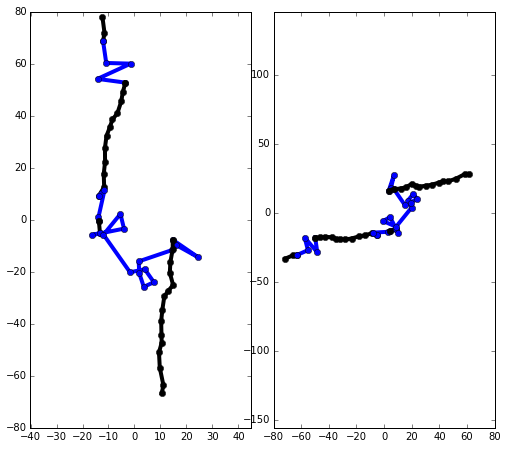

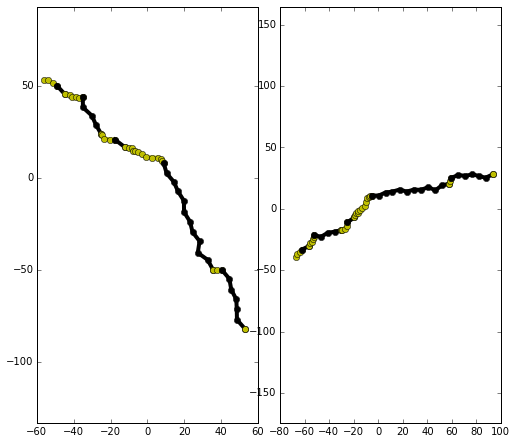

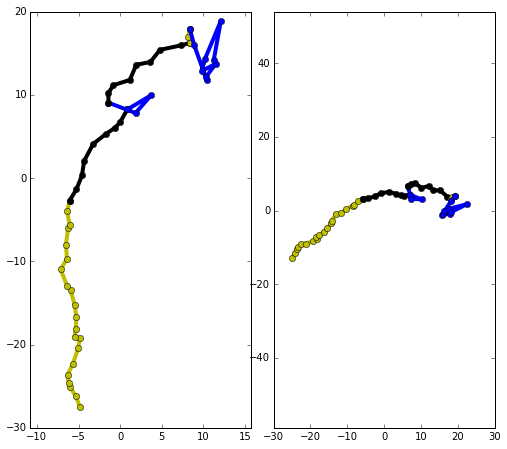

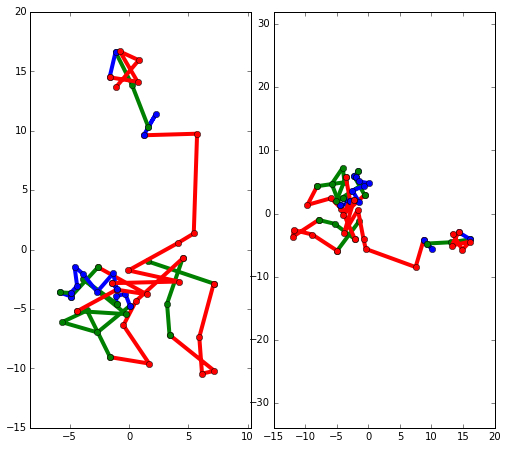

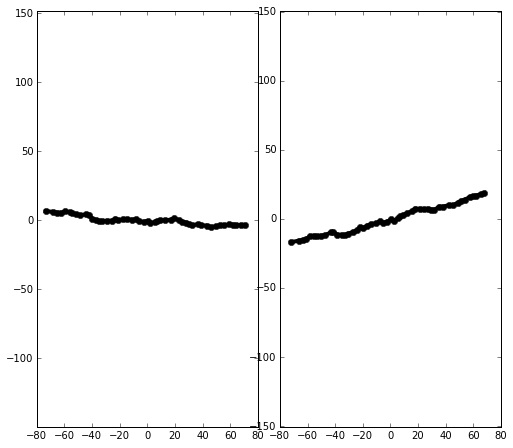

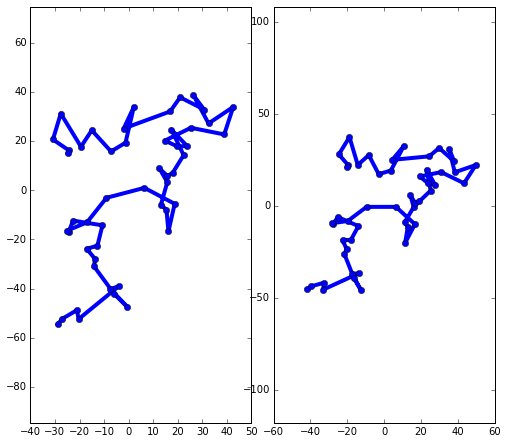

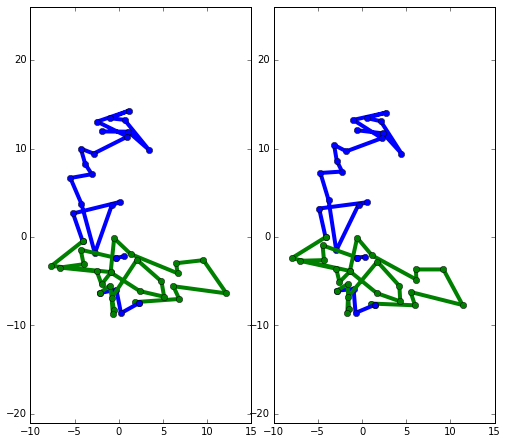

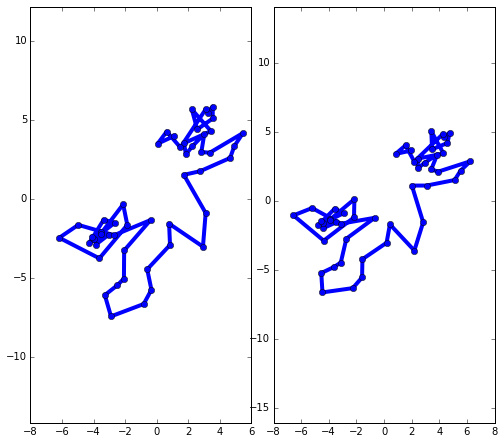

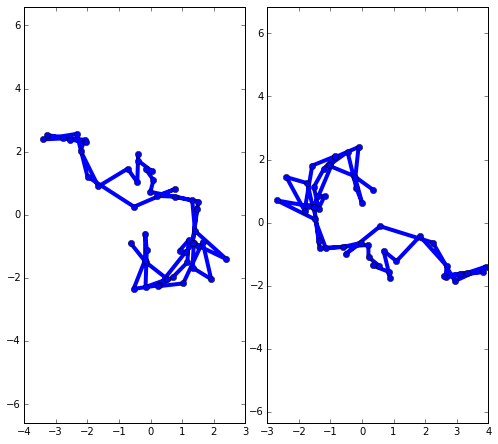

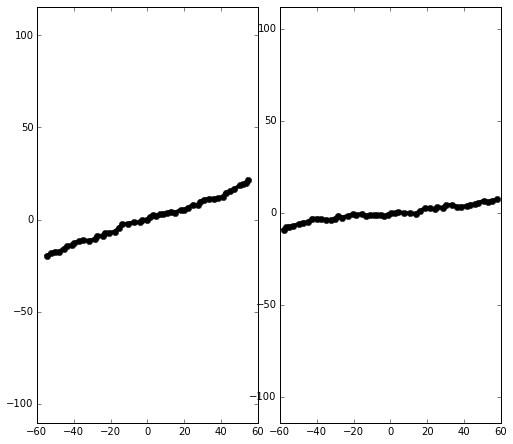

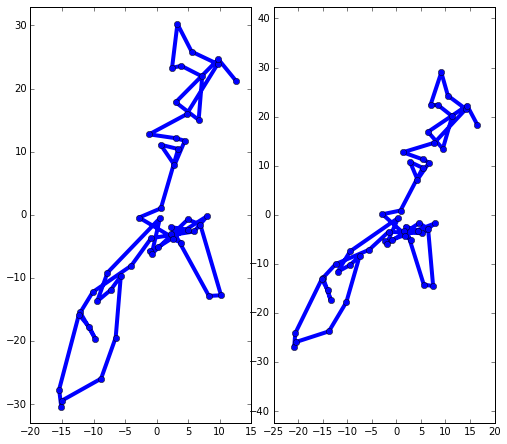

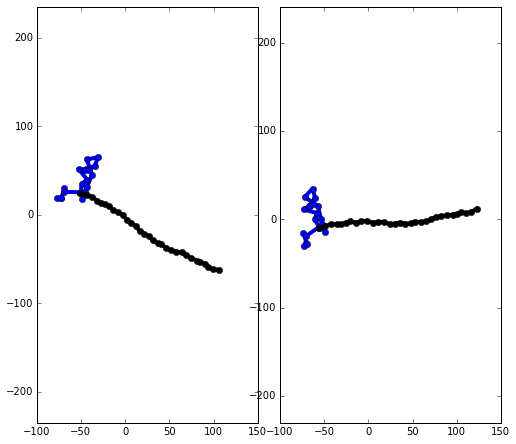

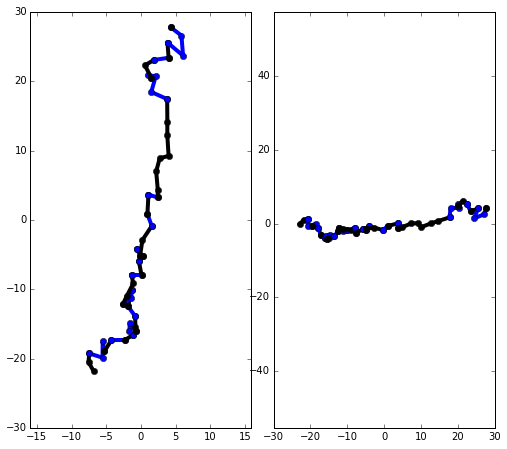

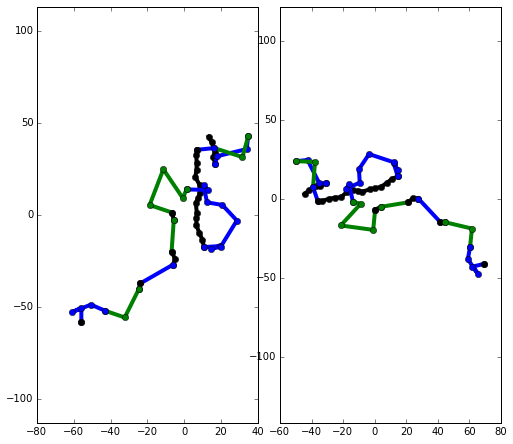

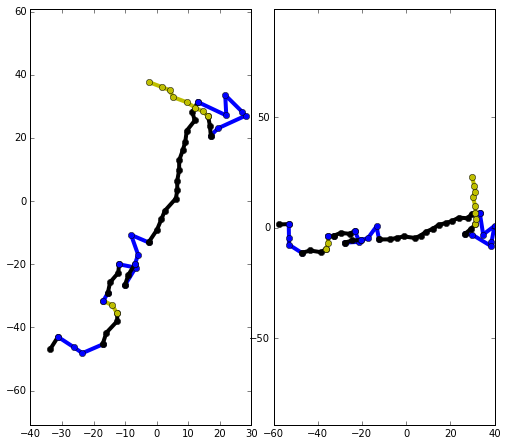

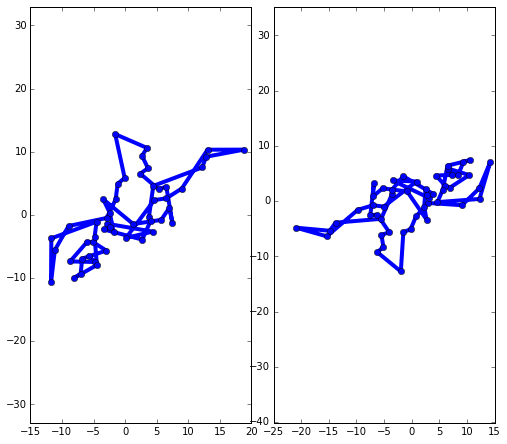

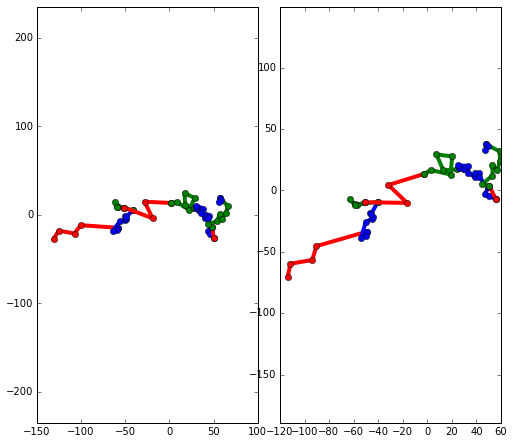

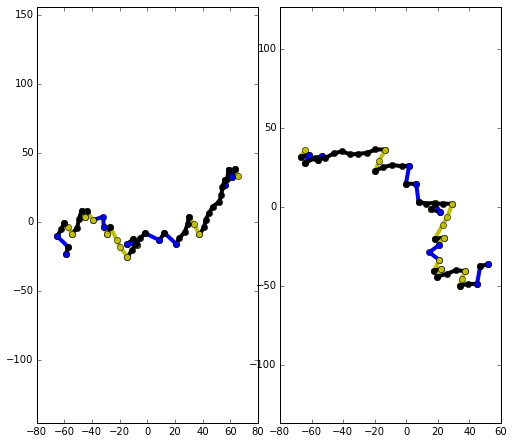

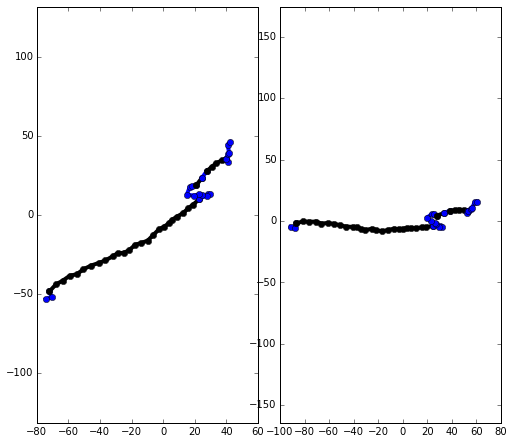

In [240]:
#print score.shape
#import matplotlib as plt
l = 50
for i in range(0,20,1):
    
    init = np.argmax(Y_trains[i],axis=-1)

   
    #    continue
    fig = figure(figsize=(15,7))
    ax = fig.add_subplot(141)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
   
    random_sin=np.random.randint(0,2,l)
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj[i][1][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    
    ax = fig.add_subplot(142)
    #print X_train[i][:l].shape
    plot_label(X_traj[i][2][:l],init[:l])
    plt.axis('equal')
  

In [107]:
from keras.layers.core import MaskedLayer,K
class Dropout2(MaskedLayer):
    '''Apply Dropout to the input. Dropout consists in randomly setting
    a fraction `p` of input units to 0 at each update during training time,
    which helps prevent overfitting.

    # Arguments
        p: float between 0 and 1. Fraction of the input units to drop.

    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)
    '''
    def __init__(self, p, **kwargs):
        super(Dropout2, self).__init__(**kwargs)
        self.p = p

    def get_output(self, train=False):
        X = self.get_input(train)
        if self.p > 0.:
            if train:
                X = K.dropout(X, level=self.p)
            #else:
            #    X = X*(1-self.p)
        return X

    def get_config(self):
        config = {'name': self.__class__.__name__,
                  'p': self.p}
        base_config = super(Dropout, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [423]:
from keras.models import Graph
from keras.layers.core import Dense, Dropout, Activation,TimeDistributedDense,Merge,Reshape
from keras.layers.core import Lambda
from keras.layers.convolutional import Convolution1D,MaxPooling1D,UpSampling1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
#from keras.objectives import categorical_crossentropy



def reverse(X):
    return X[::,::,::-1]

def output_shape(input_shape):
    # here input_shape includes the samples dimension
    return input_shape  # shap


def sub_mean(X):
    xdms = X.shape
    return X.reshape(xdms[0])

#middle = 50
graph = Graph()
graph.add_input(name='input1', input_shape=(200,5))
#graph.add_input(name='input2', input_shape=(None,2))

#nbr_filter = 10

graph.add_node(Convolution1D(nb_filter=10,filter_length=4,input_shape=(None,5),
                             border_mode="same"),input='input1',name="conv1")


graph.add_node(MaxPooling1D(pool_length=2),
               input='conv1',name="max1")

graph.add_node(UpSampling1D(length=2),
               input='max1',name="input1b")



#graph.add_node(Convolution1D(nb_filter=4,filter_length=3,input_shape=(None,2),
#                             border_mode="same"),input='input1',name="output0")

#66,4


#First with 20 of activation

inside=50

graph.add_node(LSTM(output_dim=inside, activation='sigmoid',input_shape=(200,15),
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="1allmost",inputs=["input1","input1b"],concat_axis=-1,merge_mode="concat")



graph.add_node(Lambda(reverse, output_shape),inputs=["input1","input1b"],concat_axis=-1,merge_mode="concat",
               name="reversed0")

graph.add_node(LSTM(output_dim=inside, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost1",input="reversed0")

graph.add_node(Lambda(reverse, output_shape),input="allmost1",name="reversed")



graph.add_node(LSTM(output_dim=inside, activation='sigmoid',input_shape=(200,inside),
                    inner_activation='hard_sigmoid',return_sequences=True),name="allmost_l2",
                   inputs=["1allmost","reversed"],merge_mode="sum")

graph.add_node(Lambda(reverse, output_shape),inputs=["1allmost","reversed"],merge_mode="sum",
               name="reversed0_l2")

graph.add_node(LSTM(output_dim=inside, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost1_l2",input="reversed0_l2")

graph.add_node(Lambda(reverse, output_shape),input="allmost1_l2",name="reversed_l2")


graph.add_node(Dropout(0.4),inputs=["allmost_l2","reversed_l2"],merge_mode="sum",name="output0_drop")

#Here get the subcategory
graph.add_node(TimeDistributedDense(7,activation="softmax"),input="output0_drop",
               name="output0")


graph.load_weights("tmp")
"""
graph.add_node(TimeDistributedDense(2),input="output0_drop",
               name="output0_2")
"""

##########################################
#First ehd here
#graph.add_output(name="output",input="output0")
#graph.compile('adadelta', {'output':'categorical_crossentropy' })
################################################

#Here get the number of category
graph.add_node(LSTM(output_dim=12,
                    inner_activation='hard_sigmoid',return_sequences=False),
                   name="category0_r",input="output0")

graph.add_node(LSTM(output_dim=12,
                    inner_activation='hard_sigmoid',return_sequences=False,go_backwards=True),
                   name="category0_l",input="output0")

graph.add_node(Dense(12,activation="softmax"),inputs=["category0_l","category0_r"],concat_axis=1,merge_mode="concat",
               name="category0")

graph.add_node(Reshape((1,12)),input="category0",name = "category00")

#graph.load_weights("step_check")
#############################################
#Original end there
#graph.load_weights("step_check")

#graph.add_output(name="category",input="category0")
#graph.compile('adadelta', {'output':'categorical_crossentropy'})

#############################################

#graph.add_node(TimeDistributedDense(1,activation="linear"),input='output0',name="output1")


#graph.load_weights("step_check_bigger")


graph.add_output(name="output",input="output0")
#graph.add_output(name="rOutput",input="output1")
graph.add_output(name="category",input="category00")

graph.compile('adadelta', {'output':'categorical_crossentropy' ,
                          'category':'categorical_crossentropy' })

#graph.load_weights("training_general_scale10")
#############################################
#Second end there


#############################################



#history = graph.fit({'input1':X_train[::,1], 'input2':X2_train[::0], 'output':y_train}, nb_epoch=10)
#predictions = graph.predict({'input1':X_test, 'input2':X2_test}) # {'output':...}
#graph.save_weights("step_check",overwrite=True)



In [421]:
graph.save_weights('tmp')

In [140]:
#LambdaMerge??
#graph.save_weights("deeper_test")
#graph.load_weights("deeper_test")
graph.load_weights("step_b2_180_diff_size_50")

In [110]:
Y_train_cat = np.array(Y_train_cat)#[:10000]
ish = Y_train_np.concatenateY_train_cat = np.concatenate((Y_train_cat,np.zeros((ish[0],ish[1],3))),axis=-1)
print Y_train_cat.shape

(40000, 1, 10)


In [260]:
#graph.save_weights("test",overwrite=True)
graph.optimizer.lr.set_value(.2)
#print graph.optimizer.lr.get_value()

In [424]:
import keras
import cPickle
class LossHistory(keras.callbacks.Callback):
    #losses = []
    #val_losses = []
    def __init__(self,name):
        super(LossHistory, self).__init__()
        self.name=name
        self.losses = []
        self.val_losses = []
    def on_train_begin(self, logs={}):
        
        pass
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        
    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        cPickle.dump((self.losses,self.val_losses), open(self.name, 'wb')) 
        
history = LossHistory("losses6.pick")

In [256]:
#graph.save_weights("tmp_best")
graph.load_weights("step_b2_1_diff_size_50")

In [437]:
#TRaining of graph 1
#X_train = np.array(X_train)[::,::,:4]#[:10000]
#Y_train = np.array(Y_train)[::,::,:5]#[::,::,:4]#[:10000]
#Y_train_cat = np.array(Y_train_cat)#[:10000]
#Y_train_cat
#Y_trains = np.array(Y_trains)[::,::,:5]
#print X_train[::,::].shape,Y_train.shape
for i in range(1000):
    print len(X_train)
    step= 4000
    for j in range(0,80000,step):
        graph.fit({"input1":np.array(X_train[j:j+step]),
                   "output":np.array(Y_trains[j:j+step])[::,::,:7],
                  "category":np.array(Y_train_cat[j:j+step])}, batch_size=100, 
                  nb_epoch=1,validation_split=0.05, callbacks=[history])
   
    graph.save_weights("step_b2_%i_diff_size_50"%i,overwrite=True)
#score = model.evaluate(X_test, Y_test, batch_size=16)

80000
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 27s - loss: 2.5618 - val_loss: 2.5170
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 50s - loss: 2.3899 - val_loss: 2.4306
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 74s - loss: 2.3855 - val_loss: 2.1693
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 94s - loss: 2.3349 - val_loss: 2.3306
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 15s - loss: 2.6942 - val_loss: 2.7245
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 27s - loss: 2.5077 - val_loss: 2.5014
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 50s - loss: 2.3408 - val_loss: 2.3872
Train on 3800 

KeyboardInterrupt: 

In [263]:
from keras.models import Graph
from keras.layers.core import Dense, Dropout, Activation,TimeDistributedDense,Merge
from keras.layers.core import Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
#from keras.objectives import categorical_crossentropy


def reverse(X):
    return X[::,::,::-1]

def output_shape(input_shape):
    # here input_shape includes the samples dimension
    return input_shape  # shap


def sub_mean(X):
    xdms = X.shape
    return X.reshape(xdms[0])

middle = 30
graph2 = Graph()
graph2.add_input(name='input1', input_shape=(None,5+5+10))



graph2.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost",input="input1")

graph2.add_node(Lambda(reverse, output_shape),input="input1",name="reversed0")

graph2.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost1",input="reversed0")


graph2.add_node(Lambda(reverse, output_shape),input="allmost1",name="reversed")

graph2.add_node(TimeDistributedDense(5,activation="softmax"),inputs=['allmost',"reversed"],
          merge_mode="sum",name="output0")


#graph.compile('adadelta', {'output':'categorical_crossentropy'})

#graph2.load_weights("step_b2_99")


graph2.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=False),
                   name="2allmost",input="output0")

graph2.add_node(Lambda(reverse, output_shape),input="output0",name="2reversed0")

graph2.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=False),
                   name="2allmost1",input="2reversed0")



graph2.add_node(Dense(10,activation="softmax"),inputs=['2allmost',"2allmost1"],
          merge_mode="concat",name="category0",concat_axis=1)


graph2.add_node(Reshape((1,10)),input="category0",name = "category00")


graph2.add_output(name="output",input="output0")
graph2.add_output(name="category",input="category00")

graph2.compile('adadelta', {'output':'categorical_crossentropy',
                           'category':'categorical_crossentropy' })


#############################################
#Second end there


#############################################



#history = graph.fit({'input1':X_train[::,1], 'input2':X2_train[::0], 'output':y_train}, nb_epoch=10)
#predictions = graph.predict({'input1':X_test, 'input2':X2_test}) # {'output':...}
#graph.save_weights("step_check",overwrite=True)



In [2]:
#from keras.layers.core import Siamese
#Siamese??

Using Theano backend.


Using gpu device 0: GeForce GTX 660 (CNMeM is disabled)


In [264]:
#Generate training 
X2 = []
Y2 = []
Y2_cat = []
step=4000

for j in range(0,80000,step):
    pred0 = graph.predict({"input1":np.array(X_train[j:j+step])}, batch_size=2000)
    pred_RNN = pred0["output"]
    pred_RNN_cat = pred0["category"]
    #print pred_RNN.shape
    #print pred_RNN_cat.shape
    traj_length = len(X_train[j])
    #print traj_length
    len_ep = len(X_train[j:j+step])
    X2.append(np.concatenate((np.array(X_train[j:j+step]),pred_RNN,np.tile(pred_RNN_cat,traj_length).reshape(len_ep,
                                                                              traj_length,10)),axis=2))
    Y2.append(Y_trains[j:j+step]) 
    Y2_cat.append(Y_train_cat[j:j+step])

In [294]:
"""
#First create training set wit graph
X_train = np.array(X_train)#[:10000]
Y_train = np.array(Y_train)#[:10000]
Y_train_cat = np.array(Y_train_cat)#[:10000]

pred0 =graph.predict({"input1":X_train},  batch_size=1000)
pred_RNN = pred0["output"]
pred_RNN_cat = pred0["category"]

#X_train2 = np.concatenate((X_train,pred_RNN,np.tile(pred_RNN_cat,200).reshape(X_train.shape[0],200,7)),axis=2)
"""

'\n#First create training set wit graph\nX_train = np.array(X_train)#[:10000]\nY_train = np.array(Y_train)#[:10000]\nY_train_cat = np.array(Y_train_cat)#[:10000]\n\npred0 =graph.predict({"input1":X_train},  batch_size=1000)\npred_RNN = pred0["output"]\npred_RNN_cat = pred0["category"]\n\n#X_train2 = np.concatenate((X_train,pred_RNN,np.tile(pred_RNN_cat,200).reshape(X_train.shape[0],200,7)),axis=2)\n'

In [265]:
graph2.optimizer.lr.set_value(1.)
history2 = LossHistory("losses5.pick")

In [266]:
graph2.load_weightsights_weights("step_small_3")

In [267]:
#X_train2 = np.array(X_train2)#[:10000]
#Y_train = np.array(Y_train)[::,::,:4]#[:10000]
for i in range(1000):
    for j in range(20):
        X_train2 = X2[j]
        Y_train = np.array(Y2[j])[::,::,:5]
        Y_train_cat = np.array(Y2_cat[j])
        #print X_train2.shape
        #print Y_train.shape
        graph2.fit({"input1":X_train2,
                   "output":Y_train,
                   "category":Y_train_cat}, batch_size=120, nb_epoch=1,validation_split=0.05, callbacks=[history2] )
    graph2.save_weights("step_small_%i"%i,overwrite=True)
    """
    #for j in range(15):
    X_train2 = np.concatenate(X2,axis=0)
    Y_train = np.concatenate(Y2,axis=0)[::,::,:5]
    Y_train_cat = np.concatenate(Y2_cat,axis=0)
        #print X_train2.shape
        #print Y_train.shape
    graph2.fit({"input1":X_train2,
                   "output":Y_train,
                   "category":Y_train_cat}, batch_size=120, nb_epoch=3,validation_split=0.05, callbacks=[history] )
    graph2.save_weights("step_small_%i"%i,overwrite=True)"""
#score = model.evaluate(X_test, Y_test, batch_size=16)

Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 15s - loss: 1.6184 - val_loss: 1.3582
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 29s - loss: 1.3118 - val_loss: 1.2605
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 42s - loss: 1.1299 - val_loss: 1.2801
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 55s - loss: 1.1017 - val_loss: 1.1790
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 8s - loss: 2.0408 - val_loss: 2.0775
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 14s - loss: 1.5657 - val_loss: 1.5340
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 28s - loss: 1.2986 - val_loss: 1.3024
Train on 3800 samples

KeyboardInterrupt: 

In [277]:
graph2.save_weights("step_small_train")


In [433]:
def global_process(X,batch_size=100):
    X = np.array(X)
    pred0 = graph.predict({"input1":X},  batch_size=batch_size)
    
    pred_RNN = pred0["output"]
    
    pred_RNN_cat = pred0["category"] 
    """
    traj_length = len(X[0])
    len_ep = len(X)
    #print X.shape,pred_RNN.shape
    X2 = np.concatenate((X,pred_RNN,np.tile(pred_RNN_cat,traj_length).reshape(len_ep,
                                                                              traj_length,10)),axis=2)
                                                                       
    pred1 =graph2.predict({"input1":X2},  batch_size=batch_size)
    pred_RNN = pred1["output"]
    pred_RNN_cat = pred1["category"]"""
    #np.array([ [0 for i in range(12)] for i in range(len(pred_RNN))])[::,newaxis,::] #
    return pred_RNN ,pred_RNN_cat
    

In [ ]:
def clean(traj_proba,class_traj):
    StateN = {"Ra0": 0,"Ra1":1,"Ra2":2,"Le0":3,"Ri0":4}#,"Ra3": 3,"Ra4":4,"Ra5":5,"Le0":6}
    iStateN = {v:k for k,v in StateN.items()}
    
    Model_type = {"D":[0,["Ra0"]],
                  "Dv":[1,["Le0"]],
                  "D-D":[2,["Ra0","Ra1"]],
                  "D-DvL":[3,["Ra0","Le0"]],
                  "DvR-DvL":[4,["Le0","Ri0"]],
                  "D-D-D":[5,["Ra0","Ra1","Ra2"]],
                  "D-D-DvL":[6,["Ra0","Ra1","Le0"]],
                  "D-DvL-DvR":[7,["Ra0","Le0","Ri0"]],
                  "D-D-DvL-DvR":[8,["Ra0","Ra1","Le0","Ri0"]]}
    
    iModel = {v[0]:k for k,v in Model_type.items()}

    inside =[StateN[name] for name in Model_type[iModel[class_traj]][1]]
    
    traj_max_restricted = np.argmax(traj_proba[::,inside],axe=-1)
    seq = [inside[itraj] for itraj in traj_max_restricted]
    
    return seq

In [195]:
#pred = graph.predict({"input1":X_test},  batch_size=200)
#print X_test

[]


In [116]:
#np.sum( Y1_test == Y_test )

140000

In [294]:
with open("test-set3-small.pick","w") as f:
    cPickle.dump([X_test[:100],Y_test[:100],Y_tests[:100],Y_test_cat[:100],X_traj_test[:100]],f)

In [379]:
#graph.save_weights("Allgood")
import cPickle
#with open("test-set2-small.pick","w") as f:
#    cPickle.dump([X_test,Y_test,Y_tests,Y_test_cat,X_traj_test],f)
#with open("test-set2_res.pick","w") as f:
#    cPickle.dump([pred_RNN,pred_RNN_cat],f)

with open("test-set2.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
    #[X_test,Y_test,Y_test_cat,X_traj_test] = cPickle.load(f)
  
X_test = []
X2_traj_test=[]
for _,traj,_ in X_traj_test:
       
    alpharot = 2*3.14*np.random.random()
    real_traj  = random_rot(traj,alpharot)

    alligned_traj,normed,alpha,_ = traj_to_dist(real_traj[::,:2])
    X_test.append(normed)
    X2_traj_test.append(["0",real_traj,alligned_traj])
    
X_test = np.array(X_test)
#X2_traj_test = np.array(X2_traj_test)

In [438]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test_cat = np.array(Y_test_cat)

"""score = graph.evaluate({"input1":X_test, "output":Y_test,"category":Y_test_cat[::,0,::]}, batch_size=16)
print score
pred0 =graph.predict({"input1":X_test},  batch_size=16)
pred_RNN = pred0["output"]
pred_RNN_cat = pred0["category"]
"""
pred_RNN,pred_RNN_cat = global_process(X_test,batch_size=100)
#print pred[0] # / np.sum(pred[0],axis=1)[::,newaxis]

In [393]:
#print pred_RNN.shape

(100, 200, 7)


33.005 21.5196996959
474 1000
[[5607  233    0  783  244    0]
 [1505  917    0  214   84    0]
 [ 191  517    0    6    1    0]
 [ 378   21    0 5849  245    0]
 [ 387    3    0 1040 1026    0]
 [  87    8    0  227  427    0]]

[[95  0  2  0  0  0  0  0  0  0  0  0]
 [ 2 70  0  4  7  0  0  1  0  1  0  0]
 [32  0  8  0  0 45  0  0  2  0  0  0]
 [ 0  0  0 61  0  2  4 18  2  0  0  0]
 [ 0 10  0  4 34  0  0  0  0 23  5  0]
 [ 2  0  2  0  0 74  1  0  0  0  0  0]
 [ 0  0  0 34  0  1 43  1 16  0  0  0]
 [ 0  0  0 17  3  0  0 17  8  2 32  8]
 [ 0  0  0 10  0  1  7  8 34  0  6 21]
 [ 0  0  0  0 30  0  0  1  0 27 12  0]
 [ 0  0  0  2  2  0  0 11  4 12 38 14]
 [ 0  0  0  1  1  0  1  7 15  0 17 25]]


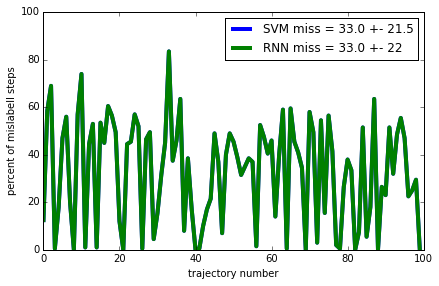

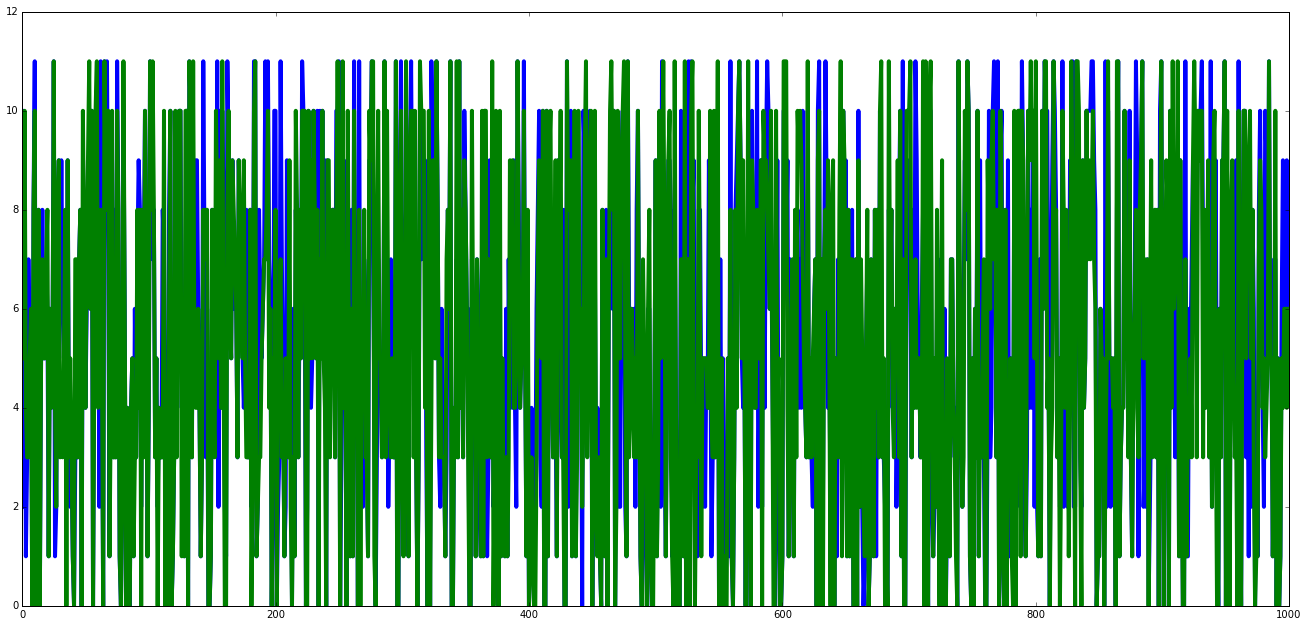

In [439]:
from sklearn.metrics import confusion_matrix
Delta_SVC = []
Delta_RNN = []
mv_RNN = []
mv = []

for i in range(0,100,1):
    
    init = np.argmax(Y_tests[i],axis=-1)

    proba_RNN = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi_RNN = np.argmax(proba_RNN,axis=-1)
    
    
    delta_RNN = np.sum(classi_RNN != init) 
    
    if 3 in classi_RNN and 4 in classi_RNN:
        classi_RNN_bis = classi_RNN.copy()
        classi_RNN_bis[classi_RNN==3] = 4
        classi_RNN_bis[classi_RNN==4] = 3
        
        
        if np.sum(classi_RNN_bis != init)  < delta_RNN:
            
            delta_RNN = np.sum(classi_RNN_bis != init) 
            classi_RNN = classi_RNN_bis
         
    
    classi_SVC = classi_RNN.copy() #pred[i]

    delta_SVC = np.sum(classi_SVC != init) 
    
    
    
    mv_RNN.extend(classi_RNN.tolist())
    mv.extend(init.tolist())
    #print delta_RNN == delta_SVC
    Delta_SVC.append(delta_SVC)
    Delta_RNN.append(delta_RNN)
    
fact = len(classi_RNN)/100.
fact2 = len(classi_SVC)/100.

Delta_RNN = np.array(Delta_RNN) / fact
Delta_SVC = np.array(Delta_SVC) / fact2


plot(Delta_SVC,label="SVM miss = %.1f +- %.1f"%(np.mean(Delta_SVC), np.std(Delta_SVC)))
plot(Delta_RNN,label="RNN miss = %.1f +- %1.f"%(np.mean(Delta_RNN), np.std(Delta_RNN)))
xlabel("trajectory number")
ylabel("percent of mislabell steps")
ylim(0,100)
legend()
print np.mean(Delta_SVC), np.std(Delta_SVC)
#print np.mean(Delta_RNN), np.std(Delta_RNN)
cat_RNN = np.argmax(pred_RNN_cat,axis=-1)[::,0]
#print cat_RNN.shape
cat= np.argmax(Y_test_cat[::,0,::],axis=-1)
#print cat.shape
#print cat_RNN.shape
print np.sum(cat != cat_RNN) , len(cat)
figure(figsize=(20,10))
plot(cat)
plot(cat_RNN)
#print set(mv)
print confusion_matrix(mv,mv_RNN)
print 
print confusion_matrix(cat,cat_RNN)
#figure()

(44, 5)
(1, 44, 5)
[  3.11217278e-01   2.13073090e-01   8.32775235e-03   2.69681662e-01
   1.52423799e-01   4.51572500e-02   1.19093544e-04]
[3 3 3 3 3 0 0 3 3 3 3 3 3 3 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0
 0 0 0 3 0 0 0]
D


/home/jarbona/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


ValueError: too many values to unpack

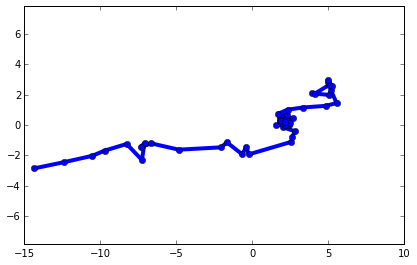

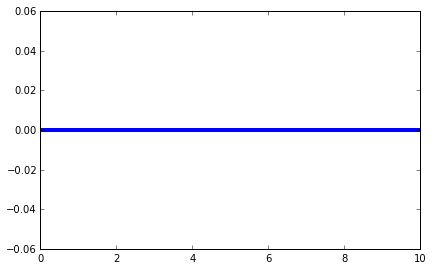

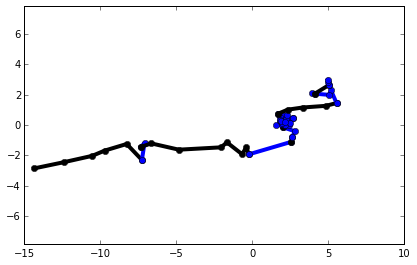

In [412]:
from scipy.io import loadmat
M = loadmat("/home/jarbona/HMM-Bayes_v1.0/Demo code/data//example_track.mat")

sample = np.array([M['track_fig1'][0][105:],M['track_fig1'][1][105:]]).T

alligned_traj,normed,alpha,_ = traj_to_dist(sample)
print normed.shape
#plot(sample[::,0],sample[::,1])
plot(alligned_traj[::,0],alligned_traj[::,1],"-o")
axis("equal")
normed  = np.array([normed])
print normed.shape
#print X_test.shape
#res = graph.predict({"input1":normed})
classi,cat = global_process(normed)
print classi[0][14]

classi = np.argmax(classi[0],axis=1)
labels = ['D','DV','D, D','D, DV','DV, DV','D, D, D','D, D, DV','D, DV, DV','DV, DV, DV']
print classi
#print cat[0]
print labels[np.argmax(cat[0],axis=1)]
figure()
plot(cat[0][0])
figure()

#p
plot_label(alligned_traj[:-1],classi)
axis("equal")


PrM,states,labels,possible,possible2 = get_step_class('/home/jarbona/HMM-Bayes_v1.0/Demo code/data/analysis_output.mat')

print states
figure()

plot_label(alligned_traj[:-1],states)
axis("equal")


In [210]:
#print np.argmax(Y_tests[168],axis=-1)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


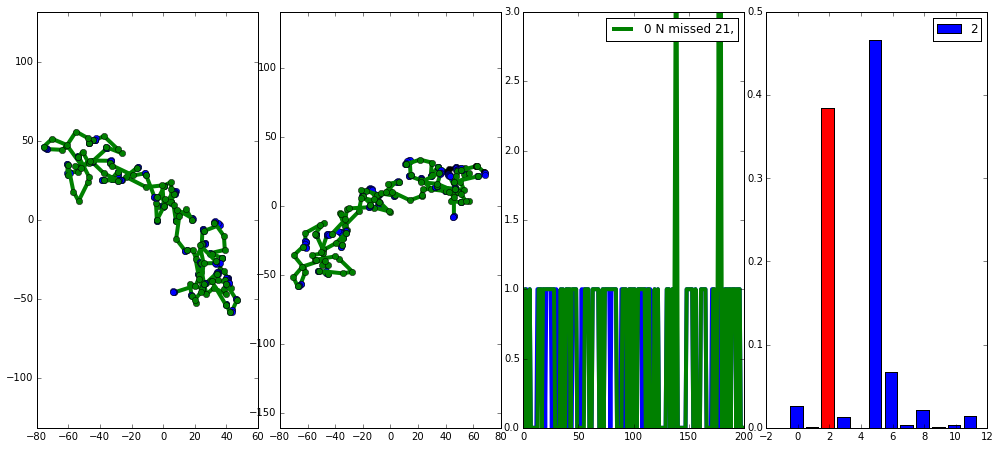

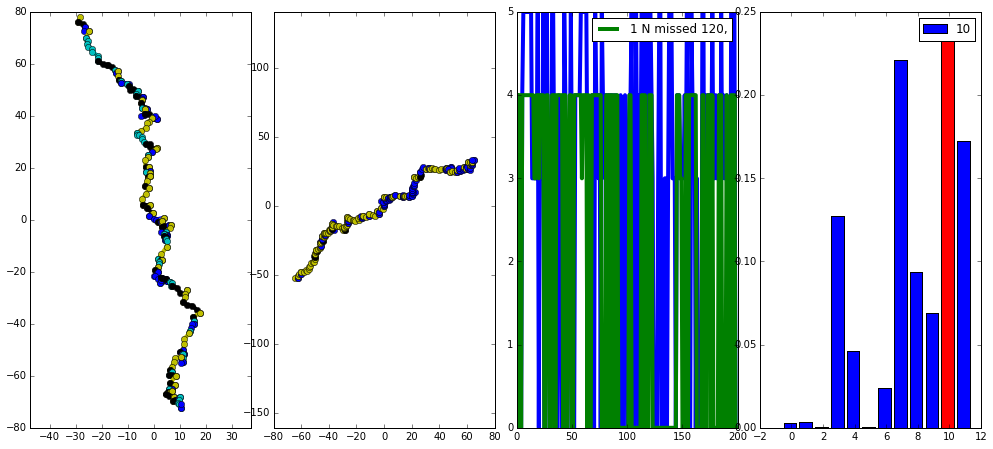

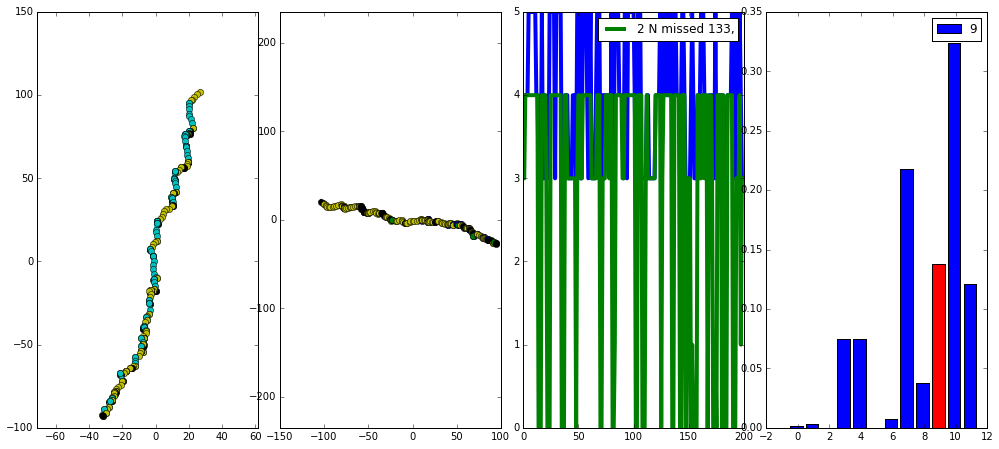

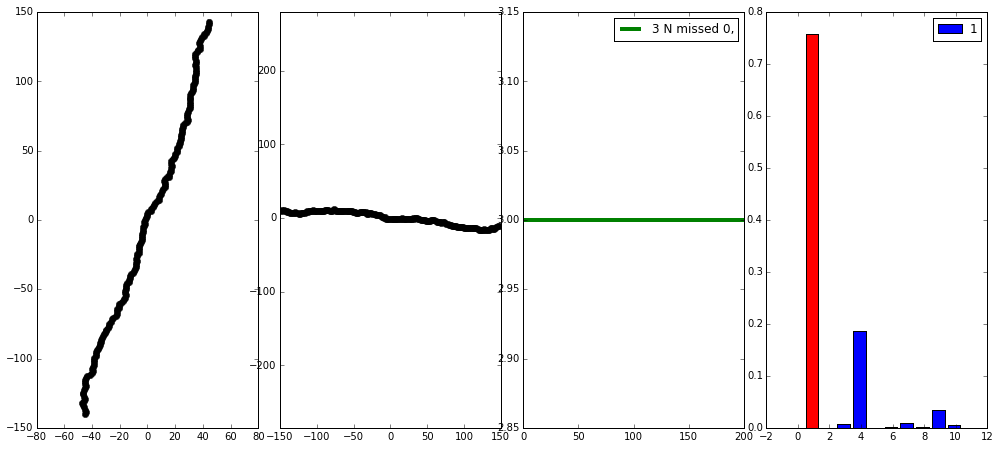

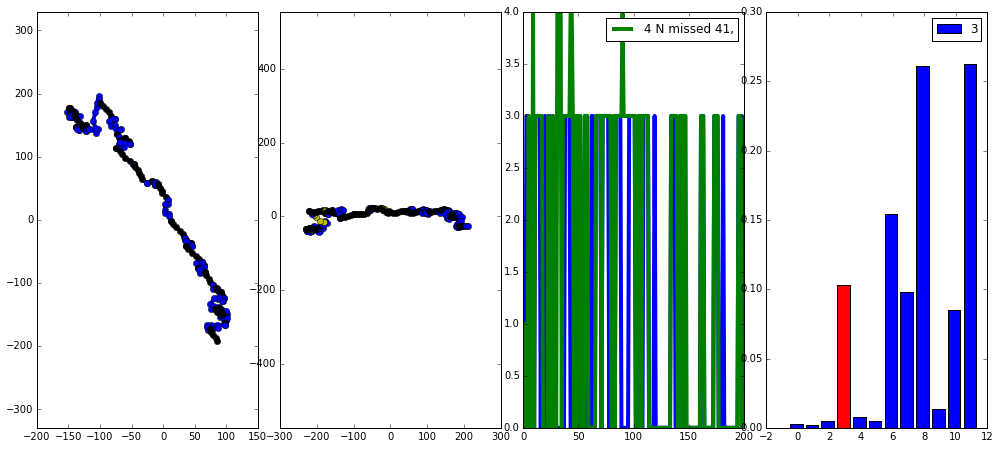

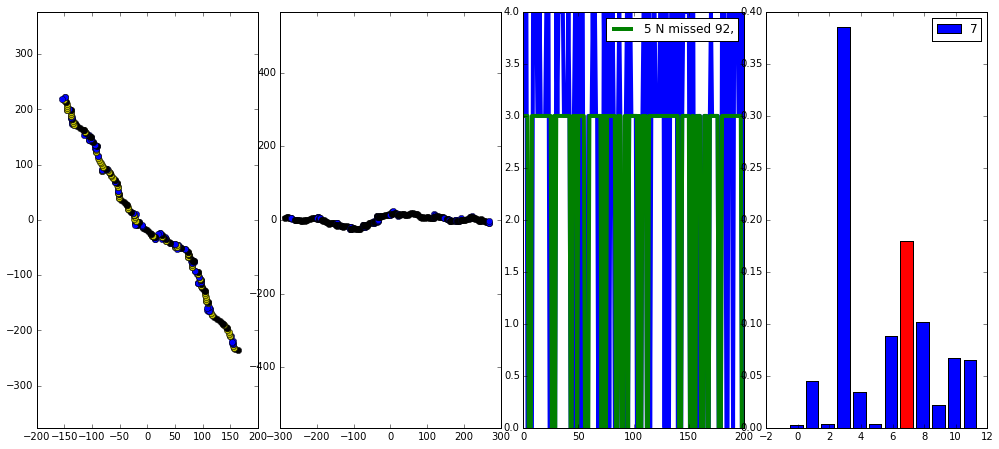

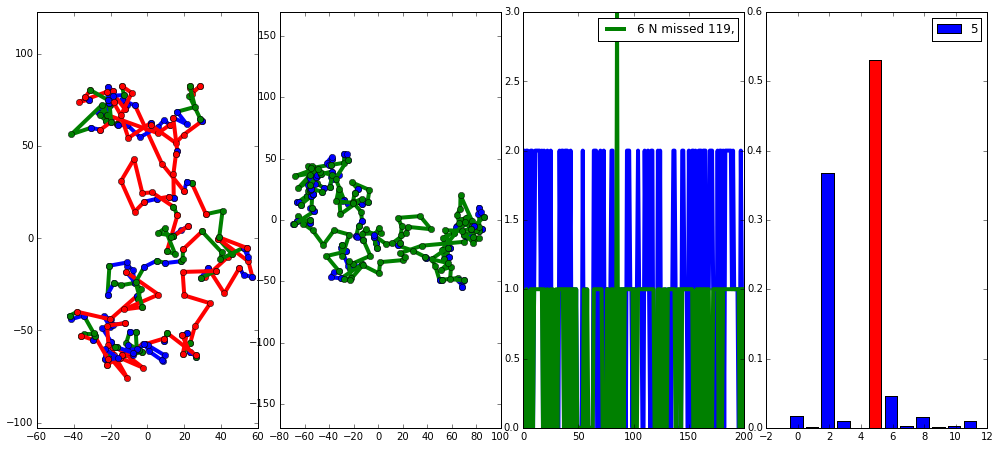

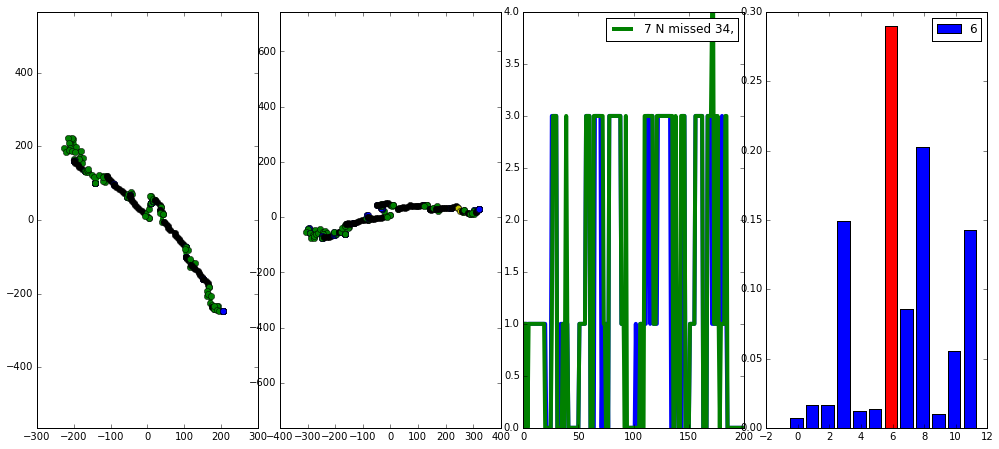

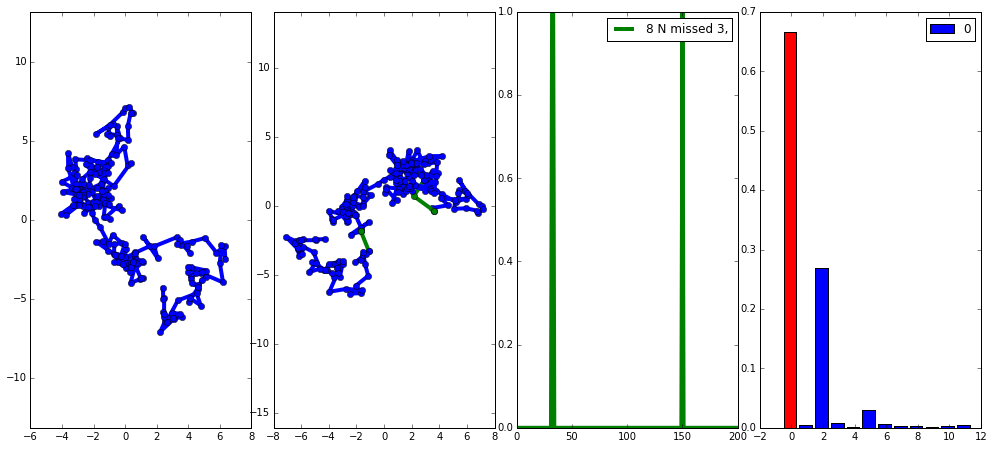

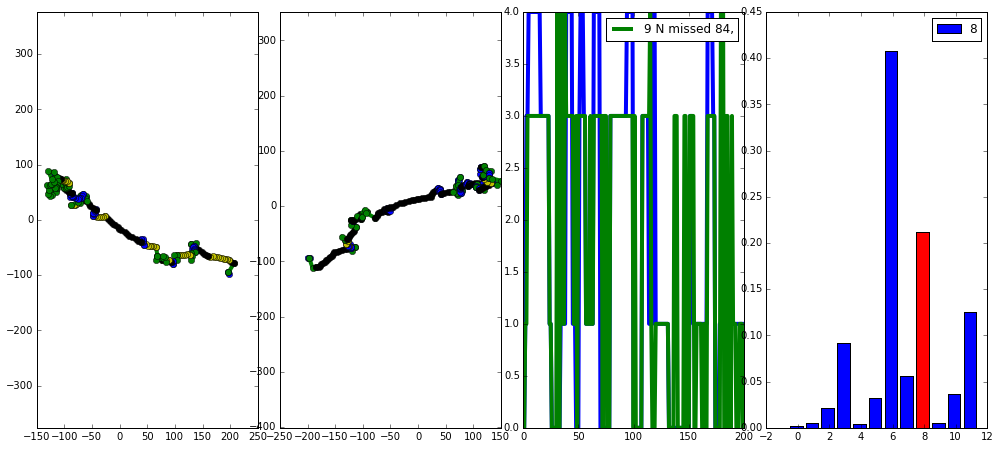

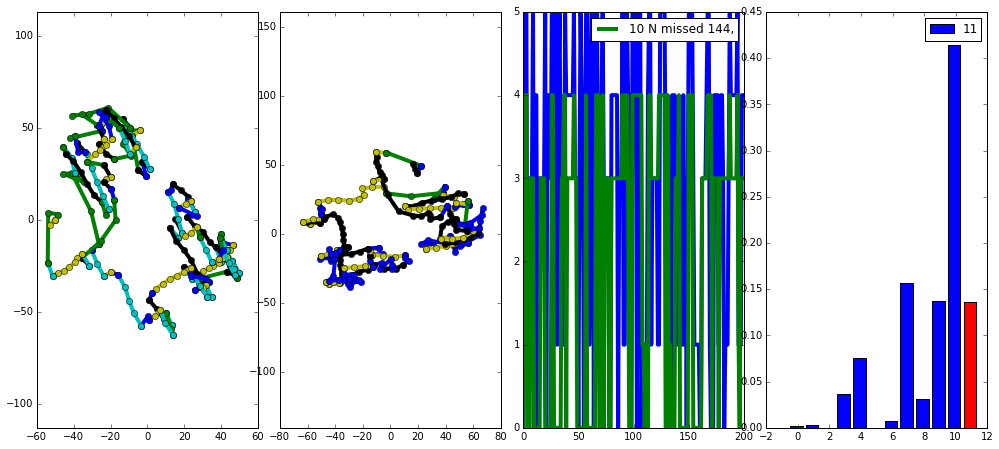

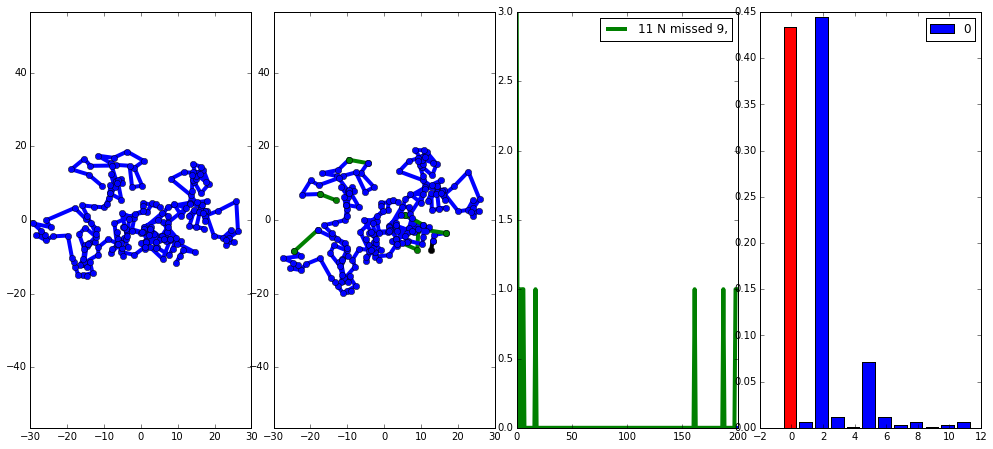

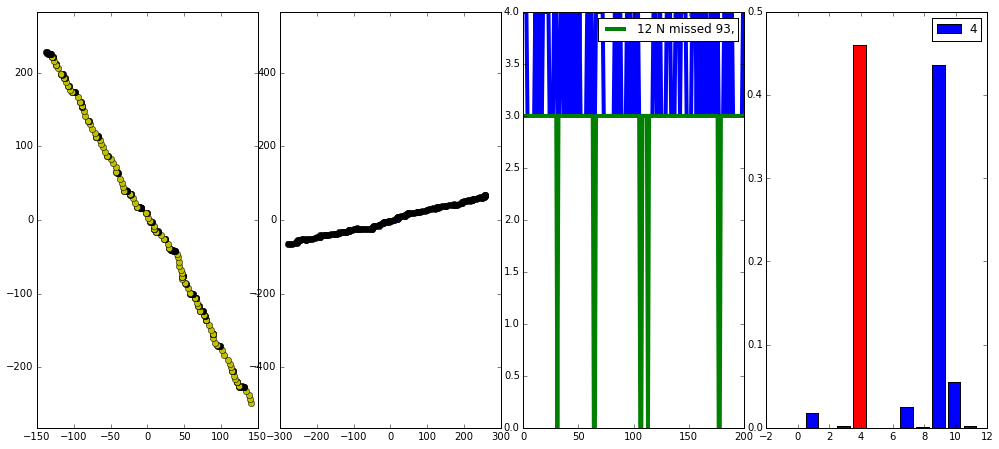

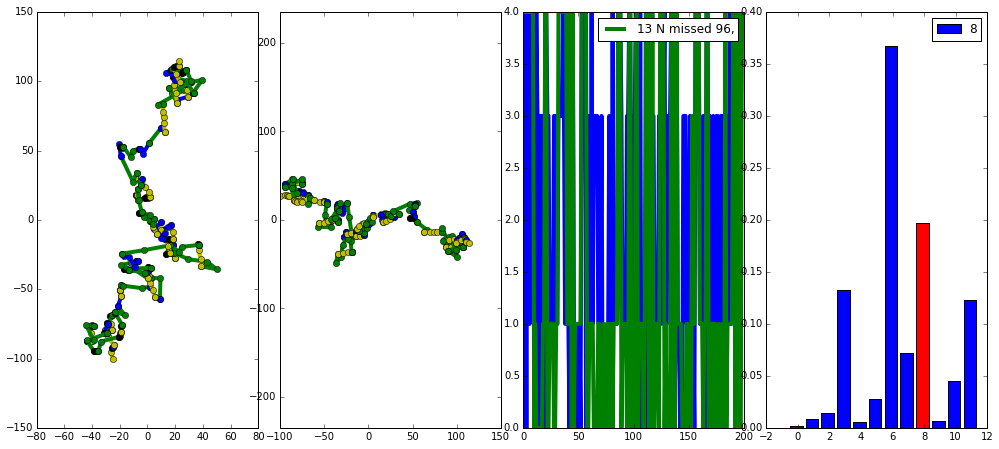

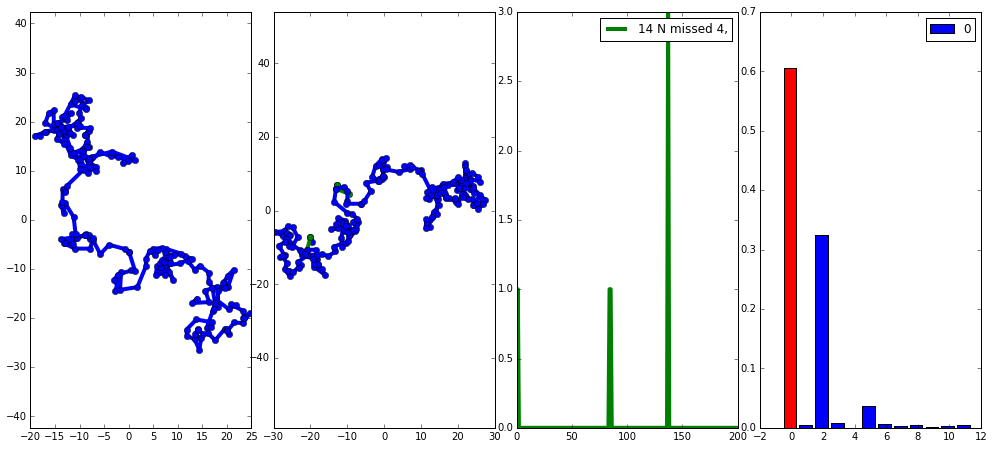

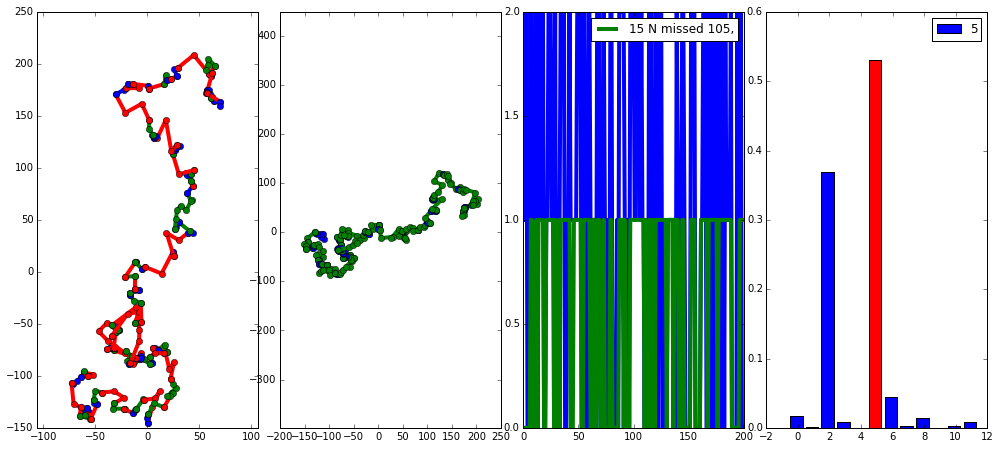

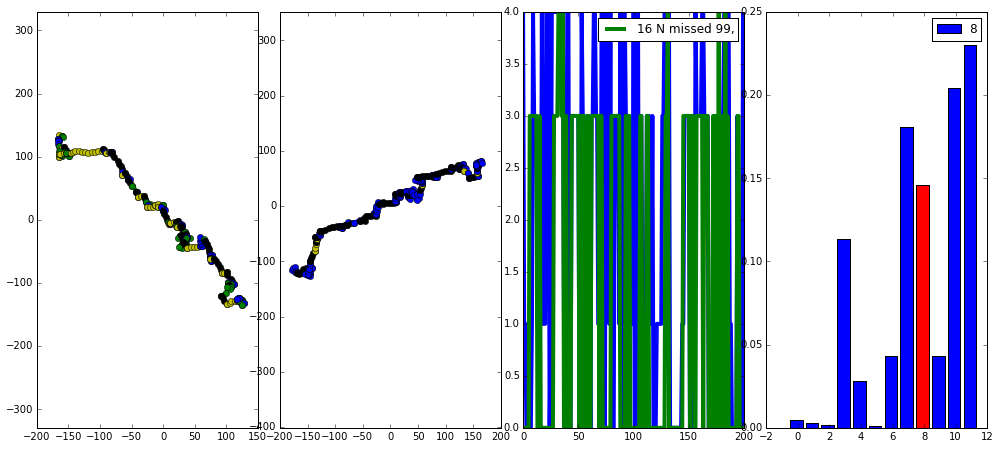

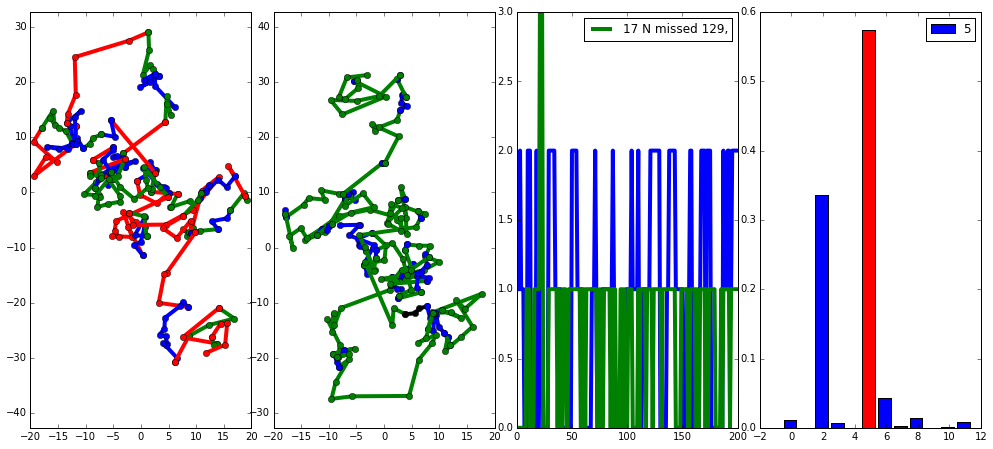

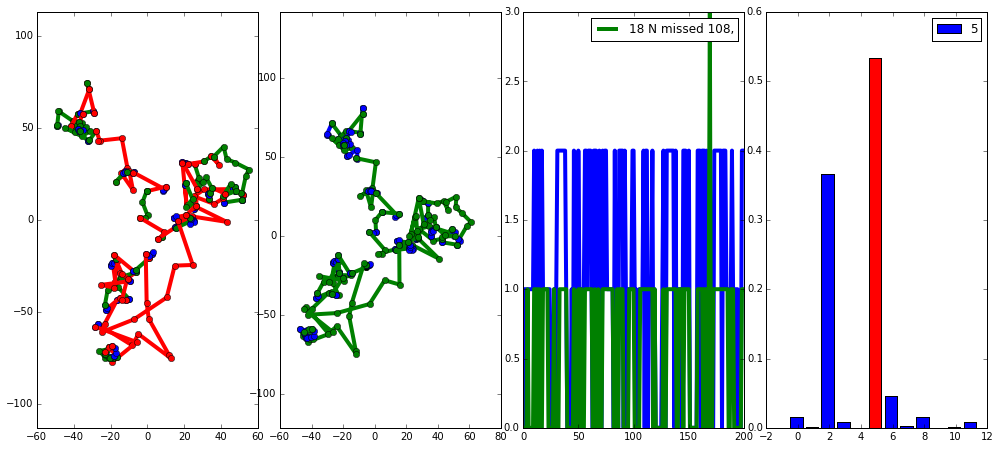

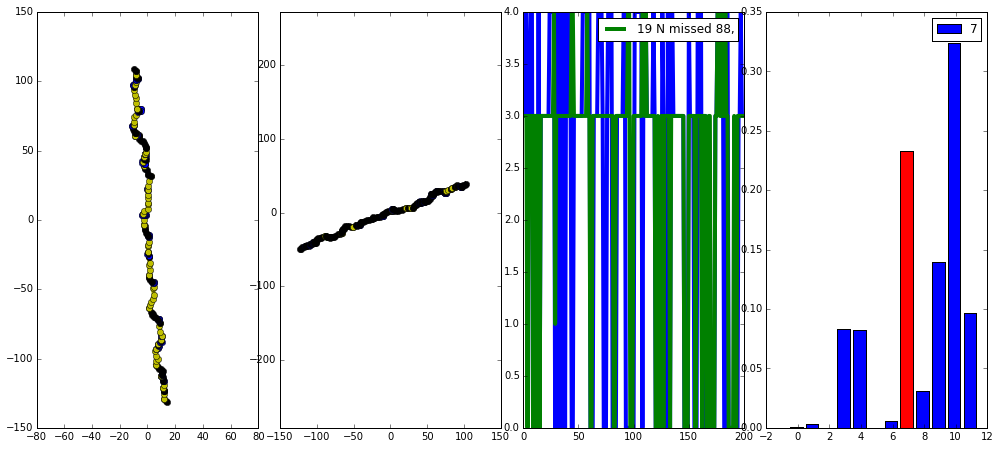

In [436]:
#print score.shape
#import matplotlib as plt
l = 200
for i in range(0,20,1):
    
    init = np.argmax(Y_tests[i],axis=-1)

    proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi = np.argmax(proba,axis=-1)
    
    delta_RNN = np.sum(init != classi)
    if 3 in classi and 4 in classi:
        classi_RNN_bis = classi.copy()
        classi_RNN_bis[classi==3] = 4
        classi_RNN_bis[classi==4] = 3
        
        
        if np.sum(classi_RNN_bis != init)  < delta_RNN:
            
            delta_RNN = np.sum(classi_RNN_bis != init) 
            classi= classi_RNN_bis

    gt = np.argmax(Y_test_cat[i,0])
    pcat =  np.argmax(pred_RNN_cat[i])
    
 
    #if gt == pcat:
    #   continue
    
    #if gt not in [4,7,8]:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 100:
    #    continue
    fig = figure(figsize=(15,7))
    ax = fig.add_subplot(141)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
   
    random_sin=np.random.randint(0,2,l)
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    
    ax = fig.add_subplot(142)
    plot_label(X_traj_test[i][2][:l],classi[:l])
    plt.axis('equal')
    
    ax = fig.add_subplot(143)
    plot( init[:l])
   
    plot(classi[:l],label="%i N missed %i,"%(i,np.sum(classi[:l] != init[:l])))
    legend()
    
    ax = fig.add_subplot(144)
    #print pred_RNN_cat[i,0].shape
    bar(np.arange(12)-0.5,pred_RNN_cat[i,0],label=np.argmax(Y_test_cat[i]))
    gt = np.argmax(Y_test_cat[i,0])
    bar(gt-0.5,pred_RNN_cat[i,0][gt],color="r")
    legend()
    
   
    

In [47]:

score = graph.evaluate({"input1":X_train[:100,::,newaxis], "output":Y_train[:100]}, batch_size=16)
print score
pred0 =graph.predict({"input1":X_train[:100,::,newaxis]},  batch_size=16)
pred = pred0["output"]
#print pred[0] # / np.sum(pred[0],axis=1)[::,newaxis]

0.913520669937


()


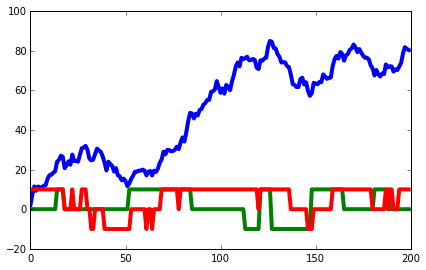

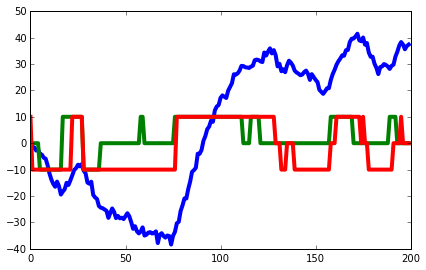

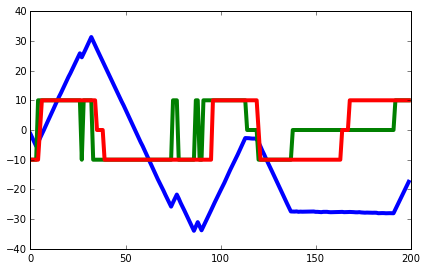

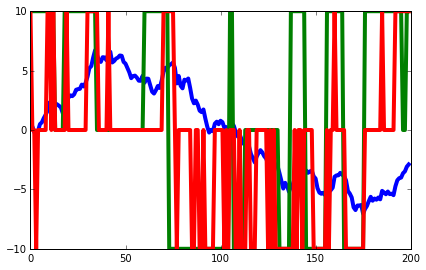

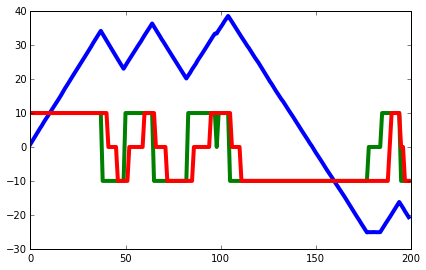

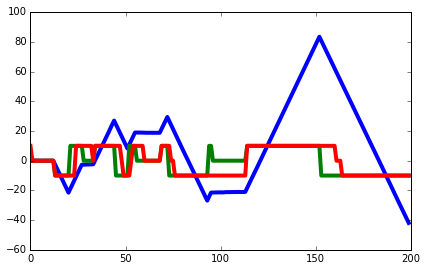

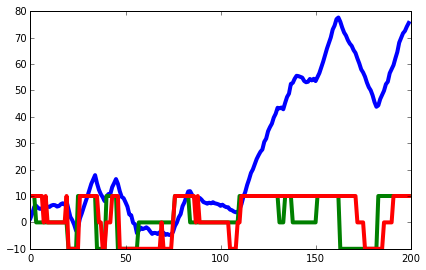

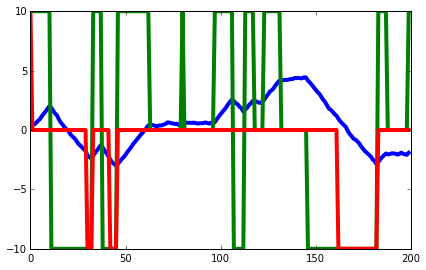

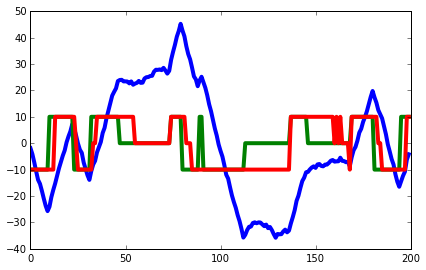

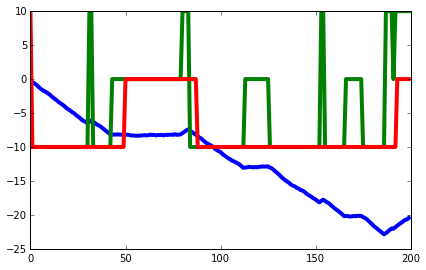

In [48]:
print score.shape
for i in range(10):
    figure()

    plot(X_train[i])
    plot( 10*(np.argmax(Y_train[i],axis=-1)-1))
    proba = pred[i] / np.sum(pred[i],axis=1)[::,newaxis]
    plot(10*(np.argmax(proba,axis=-1)-1))

In [57]:
np.array([xi for xi in X_train[12000:12000+length]]).shape

(300, 200, 4)

In [59]:
from sklearn.svm import SVC
X_train = np.array(X_train)
Y_trains = np.array(Y_trains)
xs = X_train.shape
xs=(300,200,4)
print xs, X_train[12000].shape
length = 300
X = np.array([xi for xi in X_train[12000:12000+length]]).reshape(length*xs[1],xs[2])
y =  np.argmax(np.array([yi for yi in Y_trains[12000:12000+length]]),axis=-1).flatten()[::,newaxis]
print X.shape,y.shape
#clf = SVC()
clf = SVC(degree=3)
clf.fit(X, y) 


(300, 200, 4) (200, 4)
(60000, 4) (60000, 1)


/usr/lib/python2.7/dist-packages/sklearn/svm/base.py:441: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
length=100
xs = X_test.shape
X = X_test[:length].reshape(length*xs[1],xs[2])
y =  np.argmax(Y_tests[:length],axis=-1).flatten()
print clf.score(X,y)
pred = clf.predict(X).reshape(length,200)

0.73425


In [41]:
print X_test.shape
random_sin=np.random.randint(0,2,200)
traj = plot_traj(X_test[0],plot=False,random_sin=random_sin)

(100, 200, 2)


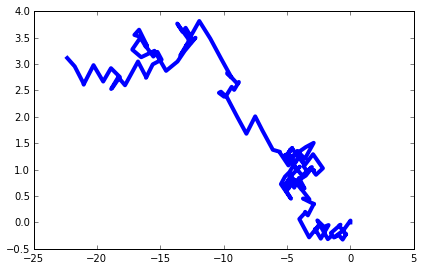

In [50]:
plot(traj[::,0],traj[::,1])
from scipy.io import savemat
D={}
D["track_fig1"] = traj[:20,:2]
D["cfg_fig1"] = {"test":1}

savemat("test.mat",D)